Лабораторная работа №2. Выполнил: Голубев Тимофей Дмитриевич. Группа: М8О-306Б-22

Подключаю библиотеки

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Читаю датасет

In [3]:
df = pd.read_csv('data/train.csv')
display(df)

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Информация о пропусках

In [4]:
display(df.isnull().sum())

ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience          

Примеры строк с пропусками. Есть как полностью пустые строки, так и с 1-2 пропусками

In [5]:
display(df[df.isnull().any(axis=1)])

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
13,1997-02-26,27.0,15000.0,NaN,NaN,48.0,Married,5.0,Other,NaN,...,Employed,High School,5.0,NaN,NaN,0.343139,1097.352250,1.293082,0.0,67.304719
17,2009-06-11,43.0,43876.0,NaN,NaN,24.0,Married,3.0,Mortgage,NaN,...,Employed,Associate,20.0,NaN,NaN,0.109708,1694.354520,0.657586,0.0,48.636125
25,1983-12-01,56.0,15000.0,NaN,NaN,12.0,Married,1.0,Own,NaN,...,Employed,Bachelor,34.0,NaN,NaN,0.218868,822.309410,1.221048,0.0,70.406884
80,2019-07-05,44.0,136297.0,NaN,NaN,36.0,Single,0.0,Rent,NaN,...,Employed,High School,24.0,NaN,NaN,0.208675,1526.095455,0.245736,1.0,37.218934
95,2011-03-06,23.0,203619.0,NaN,NaN,24.0,Divorced,0.0,Mortgage,NaN,...,Employed,Associate,0.0,NaN,NaN,0.124805,815.846517,0.098233,1.0,38.026142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10986,2016-01-09,36.0,15000.0,NaN,NaN,60.0,Married,0.0,Mortgage,NaN,...,Employed,High School,14.0,NaN,NaN,0.329262,1079.918129,1.612735,0.0,77.045945
11008,1983-05-18,37.0,300000.0,NaN,NaN,60.0,Married,3.0,Rent,NaN,...,Self-Employed,Master,12.0,NaN,NaN,0.294595,1948.292963,0.082572,1.0,42.571654
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Категориальные признаки. Список всех категорий

In [6]:
print('MaritalStatus', df['MaritalStatus'].unique())
print('HomeOwnershipStatus', df['HomeOwnershipStatus'].unique())
print('EmploymentStatus', df['EmploymentStatus'].unique())
print('EducationLevel', df['EducationLevel'].unique())

MaritalStatus ['Divorced' 'Widowed' 'Married' 'Single' nan]
HomeOwnershipStatus ['Rent' 'Mortgage' 'Other' 'Own' nan]
EmploymentStatus ['Employed' 'Self-Employed' 'Unemployed' nan]
EducationLevel ['Associate' 'High School' 'Bachelor' 'Master' 'Doctorate' nan]


Удаляю все признаки

In [7]:
df = df.dropna()
display(df.isnull().sum())

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
Interest

In [8]:
# df = pd.get_dummies(df, columns=['MaritalStatus', 'HomeOwnershipStatus', 'EmploymentStatus', 'LoanPurpose', 'EducationLevel'])

Удаляю колонку с датой

In [9]:
df = df.drop(columns=['ApplicationDate'])

In [10]:
# columns_to_delete = set()
# for i in corr_matrix:
#     for j in corr_matrix:
#         if i != j and abs(corr_matrix[i][j]) >= 0.7:
#             columns_to_delete.add(j)
# columns_to_delete.add('MaritalStatus_Single')
# print(columns_to_delete)
# df_clear = df.drop(columns=columns_to_delete)
df_clear = df

Удаляю категориальные признаки. Можно было использовать one-hot encoding, но для эксперимента решил удалить

In [11]:
df_clear = df_clear.drop(columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'])

Корреляционная матрица

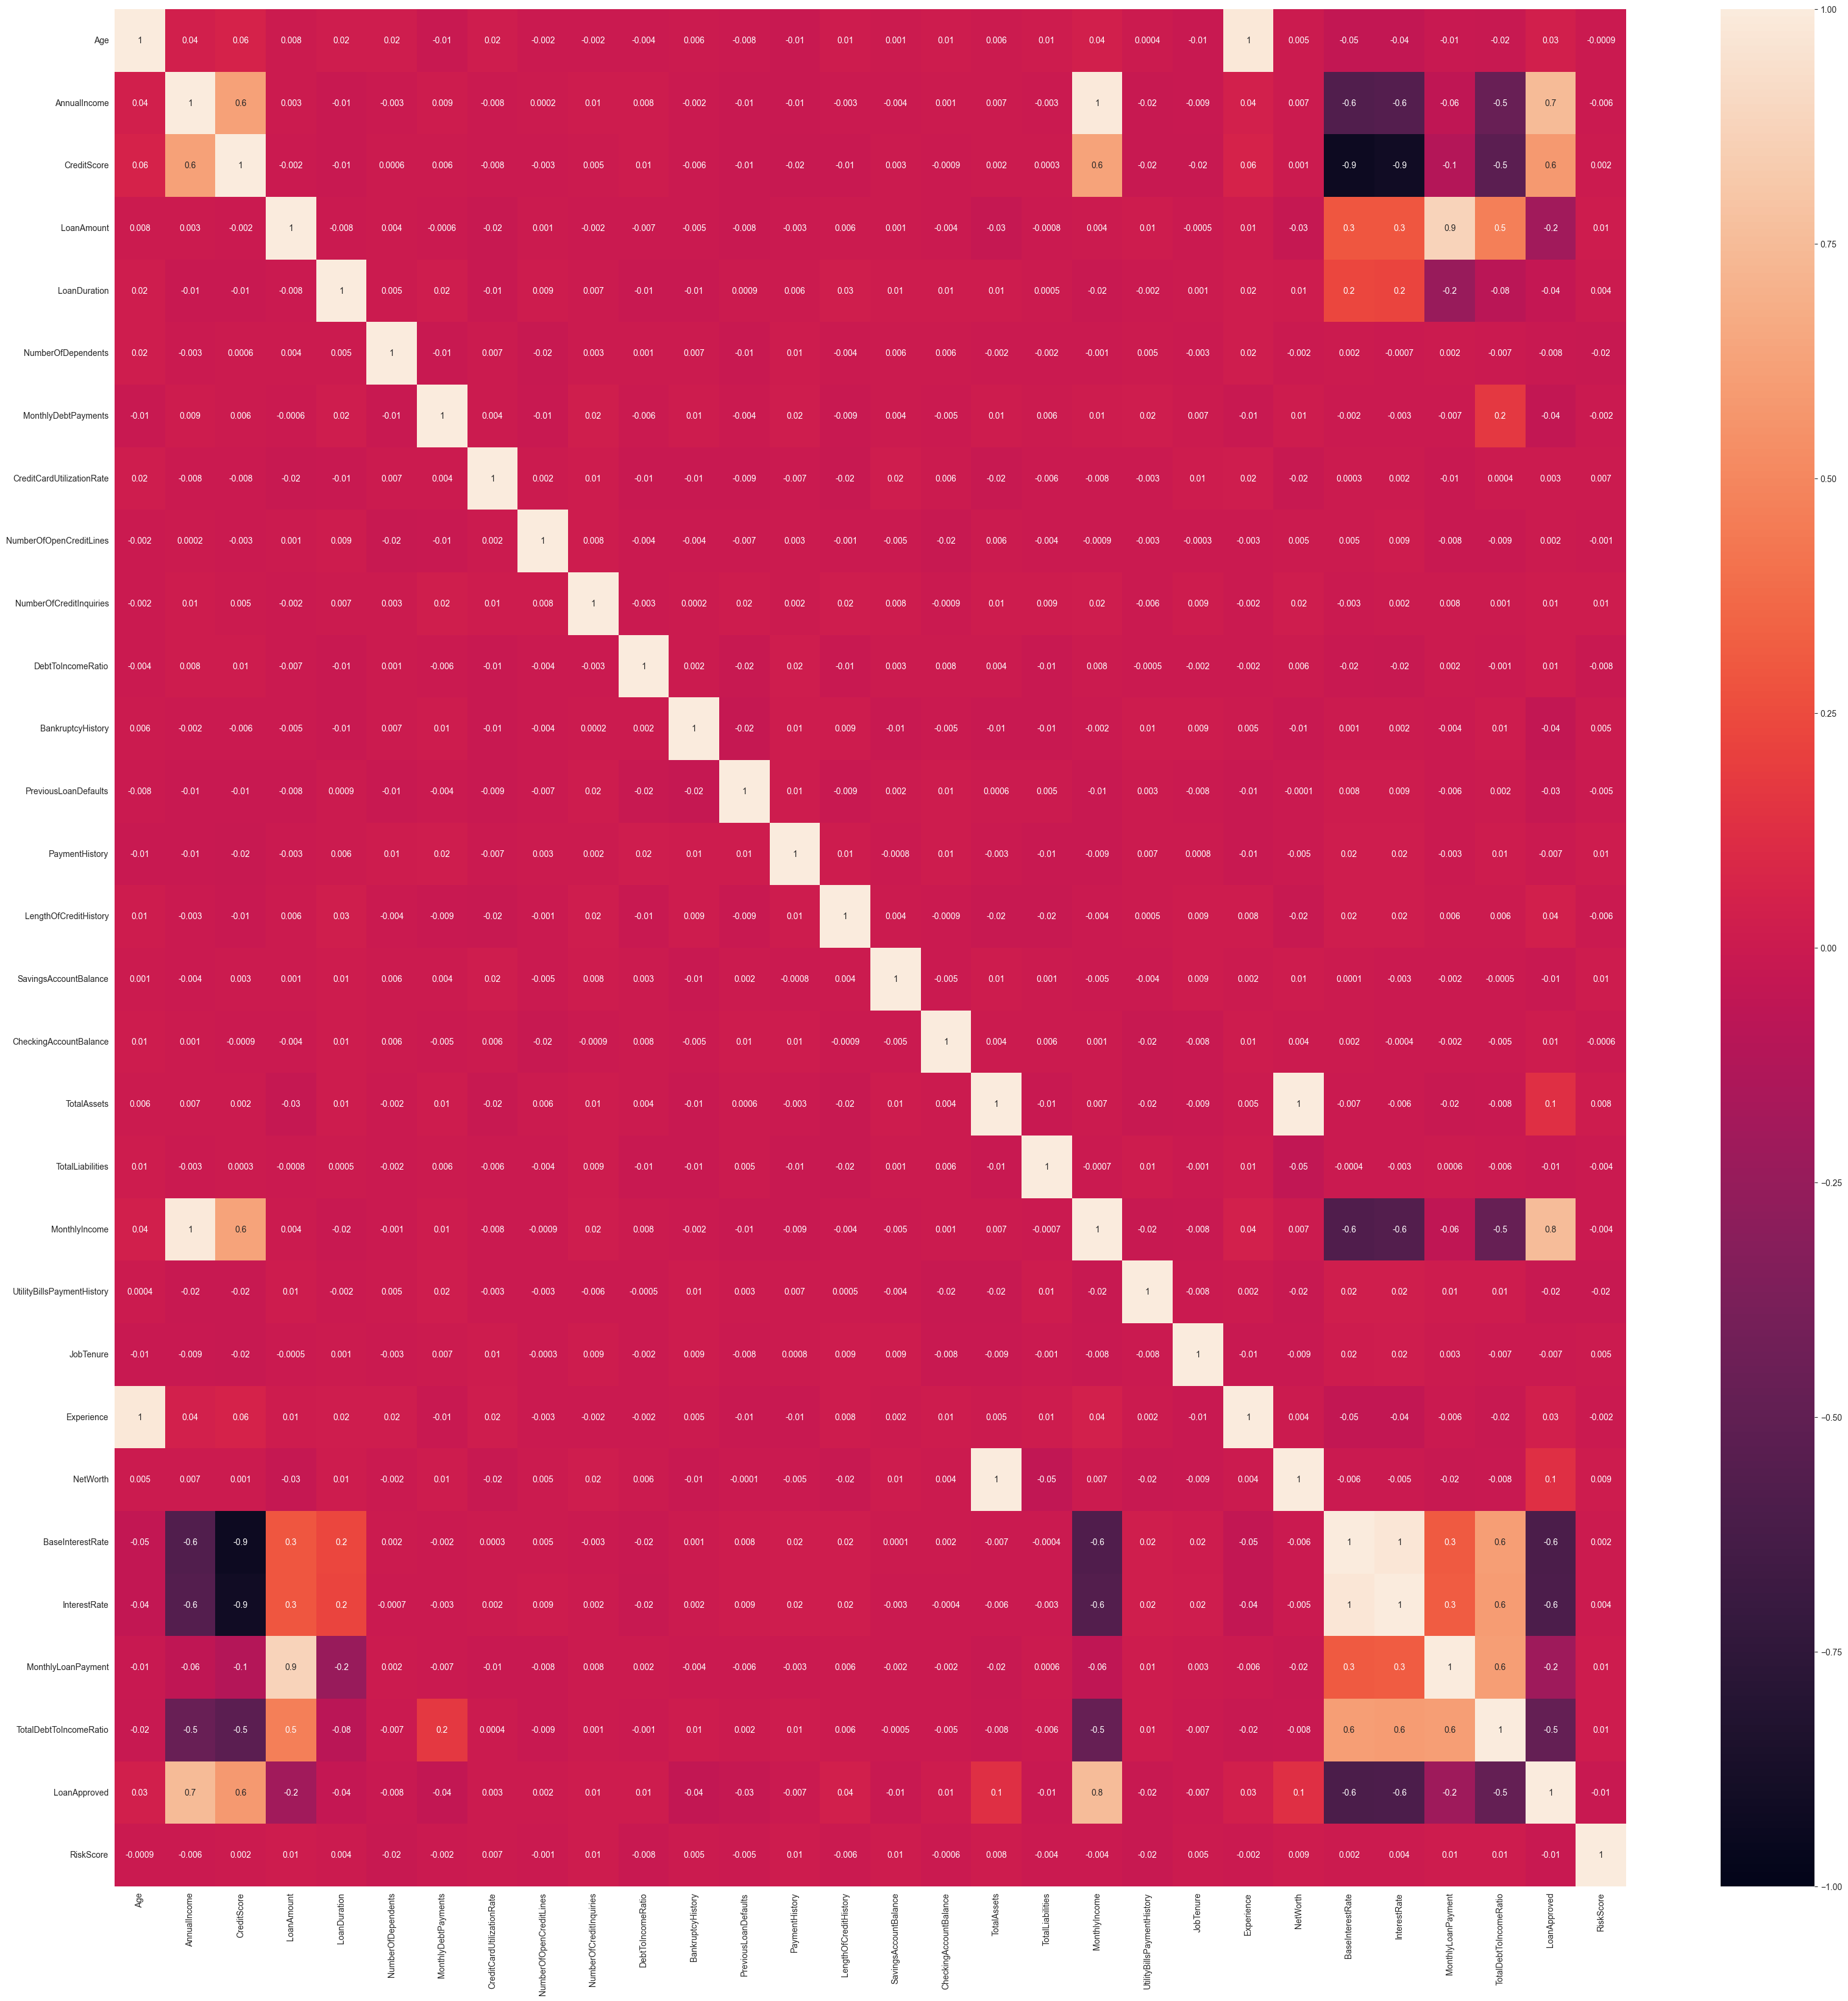

In [12]:
corr_matrix = df_clear.corr()
plt.figure(figsize=(40, 40))
sb.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt = '.1g')
plt.show()

Удаляю выбросы в RiskScore. Нормализую датасет

In [13]:
df_clear = df_clear[(df_clear['RiskScore'] <= 100) & (df_clear['RiskScore'] >= 0)]
scaler = StandardScaler()
cols = df_clear.columns[(df_clear.columns != 'BankruptcyHistory') & (df_clear.columns != 'LoanApproved')]
df_scaled = df_clear.copy()
df_scaled[cols] = scaler.fit_transform(df_clear[cols])
df_scaled.isnull().sum()


Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
NumberOfDependents            0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
Experience                    0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
LoanApproved                  0
RiskScore                     0
dtype: int64

Реализация логистической регрессии

In [14]:
from scipy.special import expit



class Classifier:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        :param learning_rate: Скорость обучения (шаг градиентного спуска).
        :param epochs: Количество итераций обучения.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Обучение модели логистической регрессии.
        :param X: np.array, матрица признаков (n_samples x n_features)
        :param y: np.array, вектор меток (n_samples,)
        """
        n_samples, n_features = X.shape
        
        # Инициализация весов и смещения
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.epochs):
            # Линейная комбинация входов
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Применение сигмоидной функции
            y_predicted = self._sigmoid(linear_model)

            # Вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        """
        Предсказание вероятностей классов для новых данных.
        :param X: np.array, матрица признаков (n_samples x n_features)
        :return: np.array, вероятности классов (n_samples,)
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X):
        """
        Предсказание классов для новых данных.
        :param X: np.array, матрица признаков (n_samples x n_features)
        :return: np.array, предсказанные метки (n_samples,)
        """
        y_predicted_proba = self.predict_proba(X)
        y_classes = [1 if i > 0.5 else 0 for i in y_predicted_proba]
        return np.array(y_classes)

    @staticmethod
    def _sigmoid(x):
        """Сигмоидная функция."""
        return expit(x)

Метрики.

In [15]:
def show_metrics(y_test, y_pred, model):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Model: {model}')
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall: {rec:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket')
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Линейный классификатор с логистической регрессией. 

Model: Linear Classifier
Accuracy: 0.9503
Precision: 0.9487
Recall: 0.9544
F1 Score: 0.9515


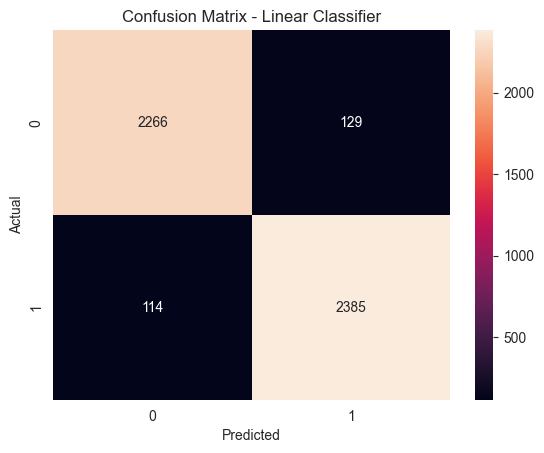

In [16]:
X = df_scaled[df_scaled.columns[df_scaled.columns != 'LoanApproved']]
y = df_scaled['LoanApproved']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

model = Classifier(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

show_metrics(y_test, y_pred, 'Linear Classifier')

SkLearn Logistic Regression

Model: SkLearn Logistic Regression
Accuracy: 0.9928
Precision: 0.9912
Recall: 0.9948
F1 Score: 0.9930


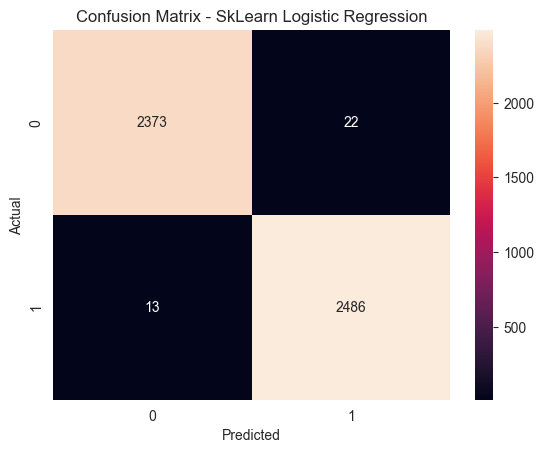

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

show_metrics(y_test, y_pred, 'SkLearn Logistic Regression')

SkLearn SVM Classifier

Model: SVM Classifier
Accuracy: 0.9890
Precision: 0.9884
Recall: 0.9900
F1 Score: 0.9892


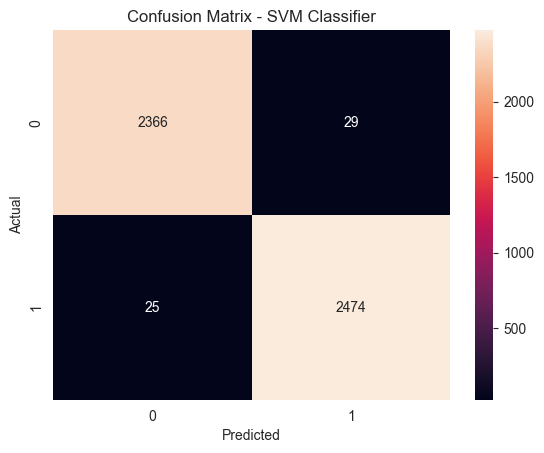

In [18]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

show_metrics(y_test, y_pred, 'SVM Classifier')

Decision Tree Classifier

Model: Decision Tree
Accuracy: 0.9773
Precision: 0.9803
Recall: 0.9752
F1 Score: 0.9777


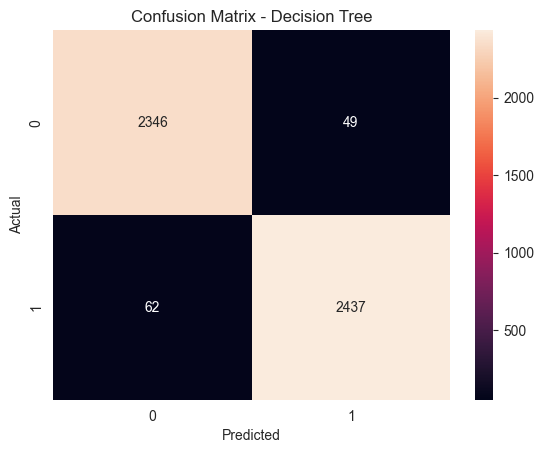

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

show_metrics(y_test, y_pred, 'Decision Tree')

SkLearn Random Forrest

Model: Random Forest
Accuracy: 0.9828
Precision: 0.9817
Recall: 0.9848
F1 Score: 0.9832


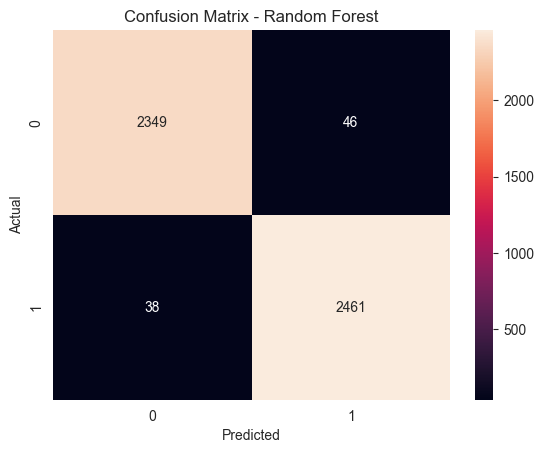

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

show_metrics(y_test, y_pred, 'Random Forest')

SkLearn Gradient Boosting

Model: SkLearn Gradient Boosting
Accuracy: 0.9918
Precision: 0.9920
Recall: 0.9920
F1 Score: 0.9920


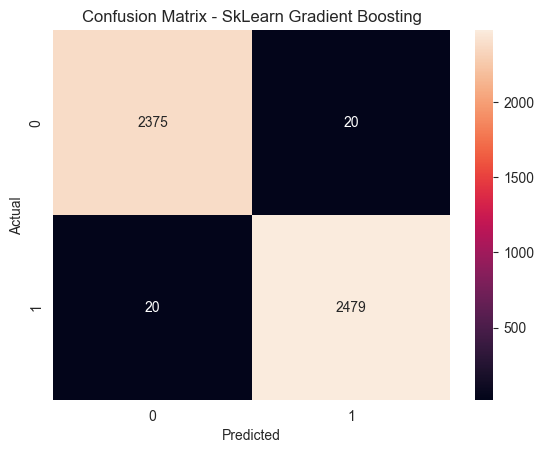

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

show_metrics(y_test, y_pred, 'SkLearn Gradient Boosting')

[LightGBM] [Info] Number of positive: 2513, number of negative: 2380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4811
[LightGBM] [Info] Number of data points in the train set: 4893, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513591 -> initscore=0.054377
[LightGBM] [Info] Start training from score 0.054377
Model: LGBM Classifier
Accuracy: 0.9935
Precision: 0.9936
Recall: 0.9936
F1 Score: 0.9936


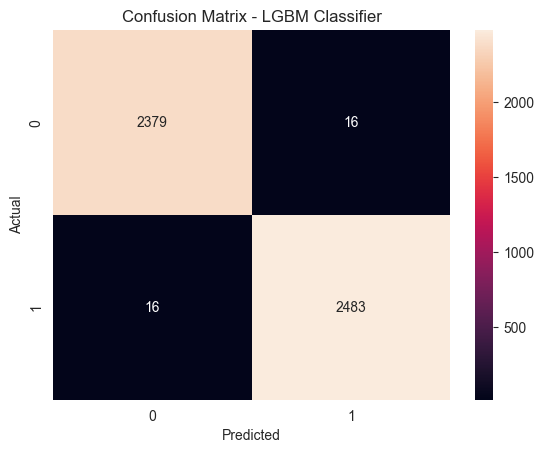

In [22]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

show_metrics(y_test, y_pred, 'LGBM Classifier')

XGBoost

Model: XGBoost
Accuracy: 0.9920
Precision: 0.9928
Recall: 0.9916
F1 Score: 0.9922


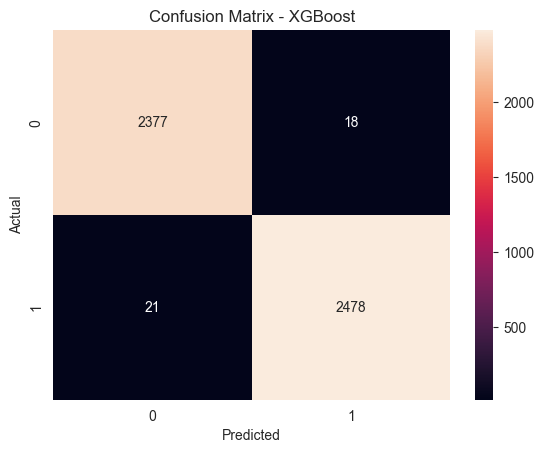

In [23]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

show_metrics(y_test, y_pred, 'XGBoost')

Naive Bayes

Model: Naive Bayes
Accuracy: 0.9381
Precision: 0.9286
Recall: 0.9520
F1 Score: 0.9401


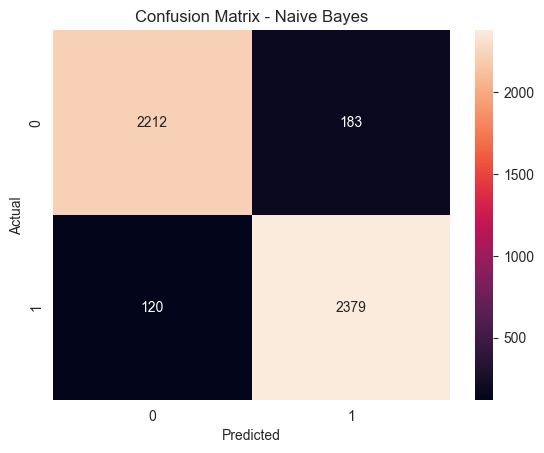

In [24]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

show_metrics(y_test, y_pred, 'Naive Bayes')


Model: AdaBoost
Accuracy: 0.9900
Precision: 0.9892
Recall: 0.9912
F1 Score: 0.9902


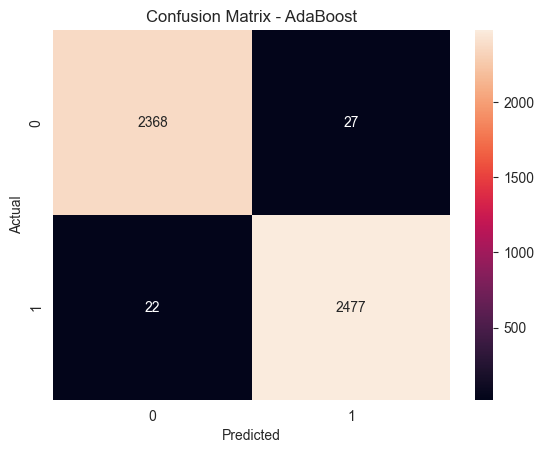

In [25]:
from sklearn.ensemble import AdaBoostClassifier
    
model = AdaBoostClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
show_metrics(y_test, y_pred, 'AdaBoost')

## Вывод

В ходе лабораторной работы я изучил и применил методы классификации. Также я реализовал свой линейный классификатор, который обучается с помощью логистической регрессии. В процессе работы я нашёл некоторый недочёт в своей обработке данных, а именно в нормализации. Она выполнялась некорректно, в последствии в датасете появлялись NaN. Эту ошибку я нашёл благодаря метрикам. У меня неверно определялся негативный класс. Из-за этого, например, метрика recall не давала ничего информативного, так как позитивный класс определялся верно. А вот показатели accuracy и precision, наоборот, показали низкие значения. Вообще, самой полезной информацией оказалась confusion matrix. На ней наглядно видно, что и куда определилось. В голове можно самому просчитать все метрики, это даже будет понятней и быстрей, чем смотреть на слово recall, переводить его в голове, вспоминать формулу, и думать: "А что этот параметр означает?".

Модель, которую я реализовал, конечно, оказалась хуже реализованных в библиотеках (их всё-таки умные люди делают). Про это писал знаменитый рэпер Оксимирон (является нехорошим человеком по мнению РФ): 

> Мой-то? Да всё в облаках, как в детстве, витает.
Ты ничем не лучше других, чудес не бывает

Деревья и SVM оказались по всем параметрам ниже на 1 сотую, чем остальные решения. Остальные справились одинаково.

Из дополнительного: посмотрел наивную байесовскую модель и адаптивный бустинг. У байесовской модели показатели хуже, чем у моей модели (на то она и наивная). Адаптивный бустинг на уровне с остальными моделями.